<a href="https://colab.research.google.com/github/antonsysoev/appl_stat/blob/gh-pages/Lect_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Распределения вероятностей в R**

Многие из стандартных распределений вероятностей имеют функции в R для вычисления:

* функция плотности/массы вероятности (d)
* кумулятивная функция распределения (p)
* квантильная функция (q)
* генерация случайной выборки (r)



**Дискретные распределения**

Если множество определения случайной величины представляет собой конечное или счетно бесконечное число значений, то случайная величина является дискретной. Дискретные случайные величины имеют функцию массы вероятности. Эта функция определяет вероятность того, что случайная величина примет каждое значение из своего множества значений. Кумулятивная функция распределения показывает вероятность того, что случайная величина меньше или равна определенному значению. Функция квантилей является обратной функцией кумулятивной функции распределения, т.е. вы задаете вероятность, а функция квантилей возвращает такое значение случайной переменной, при котором квантиль вернет эту вероятность. 

Биномиальное распределение

Например, рассмотрим эксперимент с вероятностью успеха 0,7 и 13 испытаниями, т.е. $X \sim Bin(13,0.7)$.

Мы можем использовать аналог функции плотности для расчета вероятности того или иного исхода эксперимента. Например, какова вероятность увидеть 6 успехов? Мы можем использовать функцию dbinom.

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
n <- 13
p <- 0.7
dbinom(6, size = n, prob = p)

[1] 0.0441524


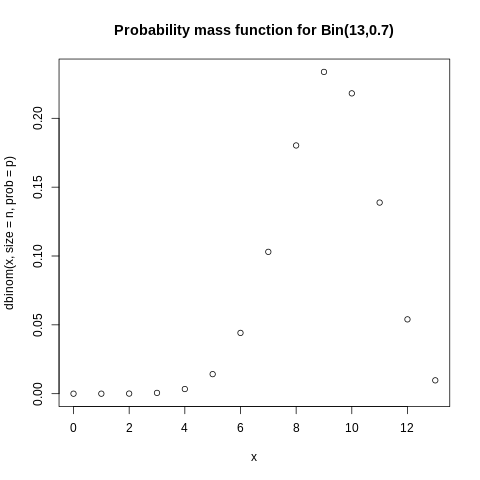

In [ ]:
%%R
x <- 0:n
plot(x, dbinom(x, size = n, prob = p), main = "Probability mass function for Bin(13,0.7)")

Если мы хотим рассчитать вероятность того, что результат будет меньше или равен определенного значению, мы можем использовать кумулятивную функцию распределения. Например, какова вероятность того, что будет 9 или меньше успехов?

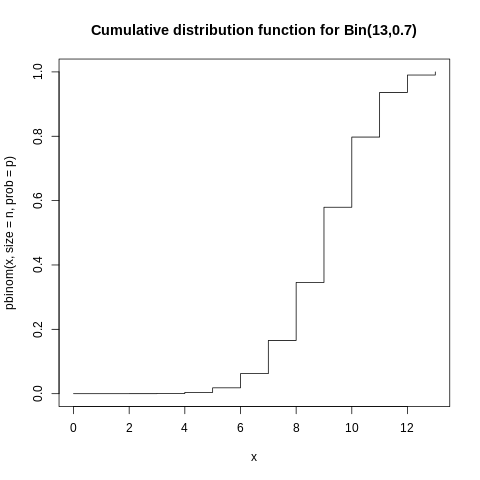

In [ ]:
%%R
pbinom(9, size = n, prob = p)
plot(x, pbinom(x, size = n, prob = p), type="s", main = "Cumulative distribution function for Bin(13,0.7)")

Для дискретной случайной величины функция распределения является ступенчатой функцией, поскольку функция перескакивает всякий раз, когда встречает значение в области определения случайной величины.

Наконец, мы можем взять случайные значения из этого биномиального распределения с помощью функции rbinom.

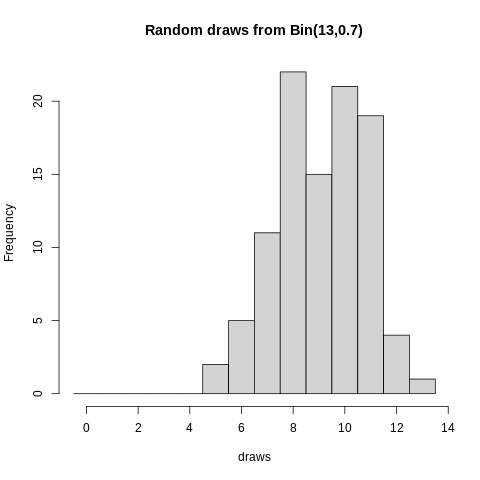

In [ ]:
%%R
draws <- rbinom(100, size = n, prob = p) # draw 100
brks  <- (0:(n+1)) - 0.5
hist(draws, breaks = brks, main = "Random draws from Bin(13,0.7)") 

Вместо количества появлений величины нам часто нужен процент (частота) их появлений. Для справки, мы можем добавить истинные вероятности с помощью аналога функции плотности (показано красным цветом).

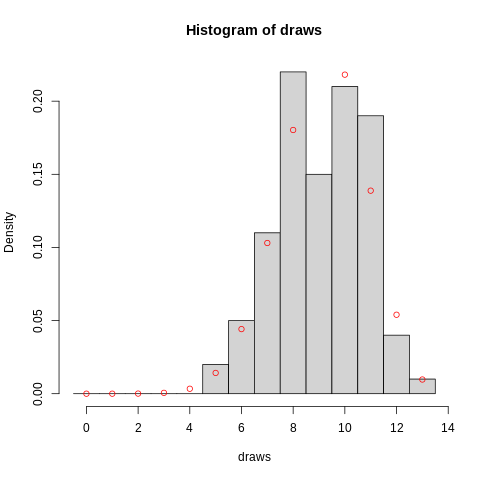

In [ ]:
%%R
hist(draws, breaks = brks, probability = TRUE)
points(x, dbinom(x, size = n, prob = p), col="red")

**Распределения непрерывных случайных величин**

В отличие от дискретных случайных величин, непрерывные случайные величины могут принимать несчетно бесконечное число значений, т.е. случайная величина может принимать любое значение между двумя заданными значениями (и бесконечностью), т.е. интервал.

Непрерывные случайные величины вместо функции массы имеют функцию плотности вероятности. При интегрировании от $a$ до $b$ эта функция дает вероятность того, что случайная величина примет значение между $a$ и $b$. Непрерывные случайные величины по-прежнему имеют кумулятивную функцию распределения, квантильную функцию и с их параметрами можно генерировать случайные величины.

**Нормальное распределение**
Наиболее важным распределением является нормальное (гауссовское) распределение. Нормальное распределение имеет два параметра: среднее ($\mu$) и дисперсию ($\sigma^2$), и мы пишем $X\sim N(μ,\sigma^2)$. Если $μ=0$ и $σ^2=1$, то соответствующую случайную величину мы называем стандартной нормальной. Функция плотности вероятности для нормального распределения представляет собой хорошо известную колоколообразную кривую.

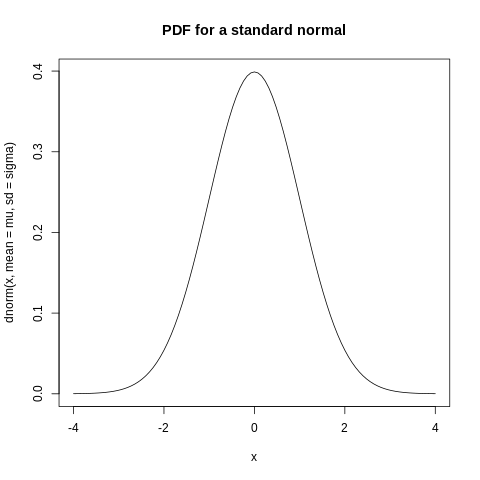

In [ ]:
%%R
mu    <- 0
sigma <- 1 # standard deviation

curve(dnorm(x, mean = mu, sd = sigma), # notice the 3rd argument is the sd
      from = -4, to = 4,
      main = "PDF for a standard normal")

Квантильная функция имеет сигмоидную форму.

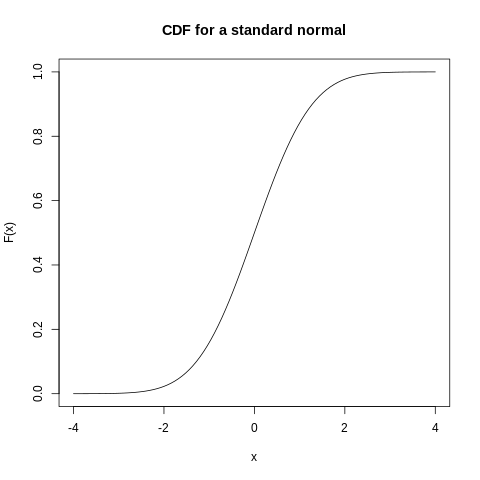

In [ ]:
%%R
curve(pnorm(x, mean = mu, sd = sigma), 
      from = -4, to = 4,
      main = "CDF for a standard normal",
      ylab = "F(x)")

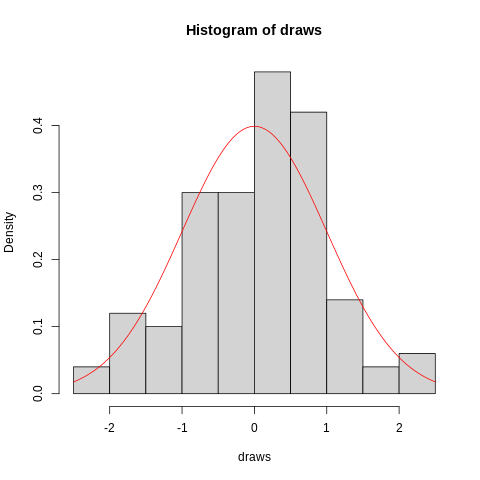

In [ ]:
%%R
draws <- rnorm(100, mean = mu, sd = sigma)
hist(draws, probability = TRUE)
curve(dnorm(x, mean = mu, sd = sigma), add = TRUE, col = "red")


**Задание**

1. Постройте функцию плотности, кумулятивную функцию распределения и квантильную функцию для нормального распределения со средним -4 и дисперсией 3, т.е. $X\sim N(-4,3)$. Затем возьмите 999 случайных выборок N(-4,3) и постройте гистограмму этих выборок с наложенной функцией плотности вероятности.

2. Предположим, что производственная линия выпускает датчики температуры и процент отказов датчиков равна 1,5%. В определенный день на заводе тестируется 70 датчиков. Если предположить, что датчики независимы (учитывая процент отказов), то $X\sim Bin(70,0.015)$.

Ответьте на следующие вопросы:

* Какова вероятность того, что ни один датчик не выйдет из строя за один день?
* Какова вероятность того, что за один день откажут 3 или более датчиков?
